# Water Pumps in Tanzania

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Improves graphics visualization
sns.set() 

## Loading The Data

In [2]:
# load the first dataset
water = pd.read_csv('WaterPumpObservations.csv')

In [2]:
# load the second dataset
pumps = pd.read_csv('WaterPumps.csv')

In [8]:
# checking that the dataset was correctly loaded
water.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
# checking that the dataset was correctly loaded
pumps.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [10]:
water.shape
pumps.shape

(59400, 2)

In [4]:
# merge dataframes
water_pumps_df = pd.merge(water, pumps)

In [5]:
#Saving a new csv file with merged dataset
water_pumps_df.to_csv('merged_water_pumps.csv')

In [7]:
water_pumps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
water_pumps_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# Data Cleaning

## 1. Missing Values Analysis

Synopsis: This dataset has seven columns with missing values. Among these columns, 'scheme_name' has the highest percentage of missing values, approximately 50%. The rest of the columns with missing values are missing less than 10% of data.

The majority of the features in this dataset are categorical in nature. One can also observe that some categorical features, including subvillage and ward, have high-cardinality. 

In [11]:
# calculate the number of missing values in each column
water_pumps_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
# calculate the number of unique values in each column
water_pumps_df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [14]:
# getting the percentage of missing values for each column into a dictionary
percent_missing = {}
for column in water_pumps_df.columns:
    percent_missing[column] = water_pumps_df[column].isnull().sum() / water_pumps_df.shape[0] *100

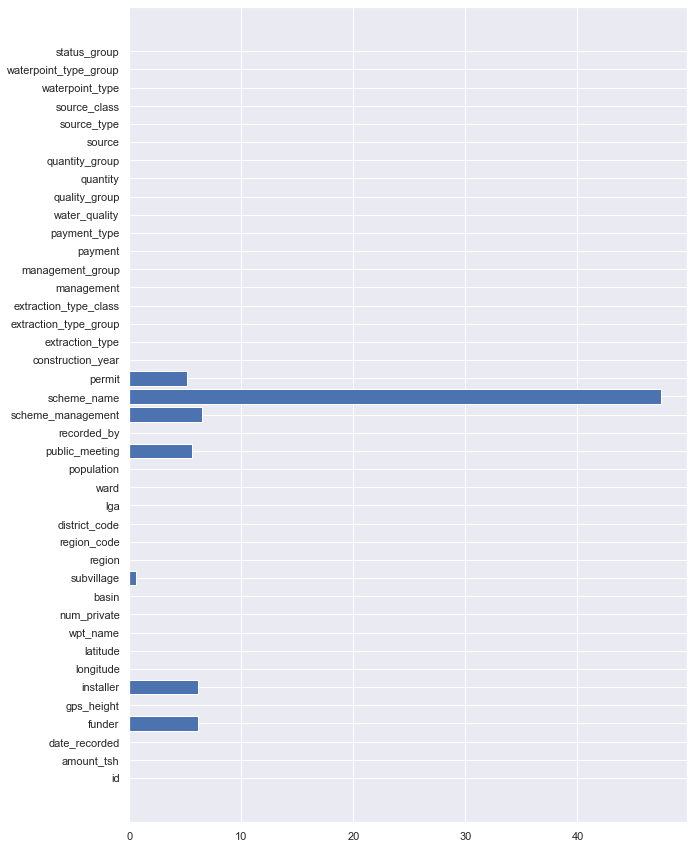

In [15]:
# bar plot displaying the percentage of missing values in each column
column = list(percent_missing.keys())
percent = list(percent_missing.values())

plt.figure(figsize=(10,15))
plt.barh(range(len(percent_missing)), percent, tick_label=column)
plt.show()

## 2. Droping Uneccessary Columns from the Dataset

Synopsis: The dataset contained several columns that had redundant observations. For example, the columns "quantity" and "quantity_group" both provided a qualitative assessment of the amount of water available at a water pump. To eliminate redundancy, one of these columns was dropped. Similarly, columns containing the same information were reduced to one.

The 'id' and 'water_point_name" columns were also dropped because every entry in the dataset is unique. Since the 'date_recorded' and 'recorded_by' columns do not influence the functionality of a water pump, they were dropped from the dataset. 

In [8]:
# checking for possible redundancy for EXTRACTION variables--action needed
water_pumps_df[['extraction_type', 'extraction_type_group', 'extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


In [18]:
# checking for possible redundancy for SCHEME variables--action needed
water_pumps_df[['scheme_name', 'scheme_management']]

,scheme_name,scheme_management
0,Roman,VWC
1,NaN,Other
2,Nyumba ya mungu pipe scheme,VWC
3,NaN,VWC
4,NaN,NaN
...,...,...
59395,Losaa Kia water supply,Water Board
59396,Ikondo electrical water sch,VWC
59397,NaN,VWC
59398,NaN,VWC


In [11]:
# checking for possible redundancy for MANAGEMENT variables--action needed
water_pumps_df[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [12]:
# checking for possible redundancy for PAYMENT variables--action needed
water_pumps_df[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [5]:
# checking for possible redundancy for QUANTITY variables--action needed
water_pumps_df[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [6]:
# checking for possible redundancy for SOURCE variables--action needed
water_pumps_df[['source', 'source_type', 'source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [7]:
# checking for possible redundancy for WATER TYPE variables--action needed
water_pumps_df[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [21]:
# checking for possible redundancy for QUALITY variables--action needed
water_pumps_df[['water_quality', 'quality_group']]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


In [8]:
# drop unecessary or redundant columns from the dataset
water_pumps_df.drop(['id', 'date_recorded', 'num_private', 'public_meeting', 'recorded_by', 'scheme_name', 'wpt_name'],axis=1, inplace=True)

In [9]:
water_pumps_df.drop(['extraction_type', 'extraction_type_group'],axis=1, inplace=True)

In [10]:
water_pumps_df.drop(['management', 'management_group'],axis=1, inplace=True)

In [11]:
water_pumps_df.drop(['payment'],axis=1, inplace=True)

In [12]:
water_pumps_df.drop(['quantity_group'],axis=1, inplace=True)

In [13]:
water_pumps_df.drop(['source', 'source_type'],axis=1, inplace=True)

In [14]:
water_pumps_df.drop(['waterpoint_type_group'],axis=1, inplace=True)

In [23]:
water_pumps_df.drop(['wpt_name'],axis=1, inplace=True)

In [ ]:
water_pumps_df.drop(['water_quality'],axis=1, inplace=True)

In [30]:
water_pumps_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [19]:
# checking for duplicate entries
water_pumps_df.duplicated().any()

False

## 3. Converting Categorical Features to Numeric Representations

In [27]:
# convert target variable to numerical values
water_pumps_df['status_group'] = water_pumps_df['status_group'].replace({'functional': 0, 'functional needs repair': 1, 'non functional': 2})

In [26]:
# the Catboost encoder will be used transform categorical features
import category_encoders as ce

In [34]:
temp_df = water_pumps_df.copy()

In [35]:
target = temp_df['status_group']

In [36]:
train = temp_df.drop('status_group', axis = 1)

In [37]:
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder(handle_missing='return_nan')

In [38]:
# encode categorical columns
cbe_encoder.fit(train, target)
train_cbe = cbe_encoder.transform(train)

In [40]:
train_cbe

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quality_group,quantity,source_class,waterpoint_type
0,6000.0,0.325511,1390,0.714117,34.938093,-9.856322,0.643500,0.405880,0.412435,11,...,0.905931,0.890347,1999,0.700640,0.427626,0.791295,0.791295,0.623040,0.855505,0.677798
1,0.0,0.385947,1399,0.321029,34.698766,-2.147466,0.908171,0.140194,1.069463,20,...,0.775543,0.821709,2010,0.700640,1.026938,0.791295,0.791295,0.857689,0.791795,0.677798
2,25.0,0.093462,686,0.559514,37.460664,-3.821329,0.744865,0.995708,0.692450,21,...,0.905931,0.821709,2009,0.700640,0.598914,0.791295,0.791295,0.623040,0.791795,1.161344
3,0.0,0.771116,263,0.887180,38.486161,-11.155298,1.183988,1.046731,1.321110,90,...,0.905931,0.821709,1986,0.881528,1.026938,0.791295,0.791295,1.943628,0.855505,1.161344
4,0.0,0.841162,0,0.844420,31.130847,-1.825359,0.908171,0.280387,0.866699,18,...,NaN,0.821709,0,0.700640,1.026938,0.791295,0.791295,0.749159,0.791795,0.677798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,0.235419,1210,0.235419,37.169807,-3.253847,0.744865,0.168232,0.720740,3,...,0.465566,0.821709,1999,0.700640,0.598914,0.791295,0.791295,0.623040,0.855505,0.677798
59396,4700.0,0.035048,1212,0.052573,35.249991,-9.070629,0.674419,0.056077,0.412435,11,...,0.905931,0.821709,1996,0.700640,0.427626,0.791295,0.791295,0.623040,0.791795,0.677798
59397,0.0,NaN,0,NaN,34.017087,-8.750434,0.674419,0.280387,0.891561,12,...,0.905931,0.890347,0,0.678607,0.567382,0.427070,0.494684,0.623040,0.855505,0.705463
59398,0.0,0.210290,0,0.806860,35.861315,-6.378573,0.674419,1.113646,0.988120,1,...,0.905931,0.821709,0,0.678607,1.026938,0.791295,0.791295,0.857689,0.855505,0.705463


Summary: The Catboost is a target-based encoder. As such, it encodes categorical features according to a the target value, which in this case is given by the "status_group" column.

## 4. Impute Missing Values Using KNN Imputer

In [11]:
# number of missing values in each column
train_cbe.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [43]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_water_pumps_df = scaler.fit_transform(train_cbe)

In [45]:
scaled_water_pumps_df

array([[ 1.89566509, -1.47005735,  1.04125207, ...,  0.53998534,
        -0.49610572, -0.8856327 ],
       [-0.10597003, -1.29988156,  1.05423701, ..., -1.85860517,
        -0.49610572, -0.8856327 ],
       [-0.09762988, -2.12346169,  0.02554104, ..., -1.85860517,
         0.97229032, -0.8856327 ],
       ...,
       [-0.10597003,         nan, -0.96420011, ...,  0.53998534,
        -0.41209575, -0.8856327 ],
       [-0.10597003, -1.79449709, -0.96420011, ...,  0.53998534,
        -0.41209575, -0.8856327 ],
       [-0.10597003,  0.76673429, -0.68863079, ...,  0.53998534,
        -0.41209575, -0.8856327 ]])

In [46]:
# convert array back to a dataframe
scaled_water_pumps_df = pd.DataFrame(data = scaled_water_pumps_df, columns=train_cbe.columns, index=train_cbe.index)

In [ ]:
# merge scaled dataframe and target column
scaled_water_pumps_df = train_cbe.join(target)

In [50]:
# impute missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
filled_values = imputer.fit_transform(scaled_water_pumps_df)
filled_df = pd.DataFrame(data=filled_values, columns=scaled_water_pumps_df.columns, index=scaled_water_pumps_df.index)

In [51]:
# check for missing values
filled_df.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
payment_type             0
quality_group            0
quantity                 0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [53]:
# Saving a new csv file with cleaned dataset
filled_df.to_csv('cleaned_water_pumps_data.csv')

# Exploratory Data Analysis

## 1. Factors that Affect Water Pump Functionality

In [2]:
water_pumps = pd.read_csv('merged_water_pumps.csv')

/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_group', ylabel='count'>

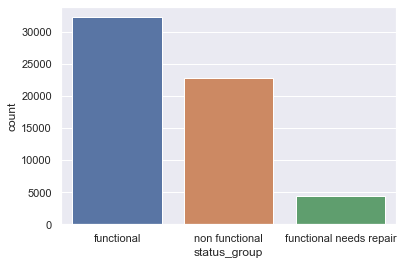

In [5]:
# bar plot showing the distribution of the status of water pumps
sns.countplot(water_pumps['status_group'])

<AxesSubplot:xlabel='payment'>

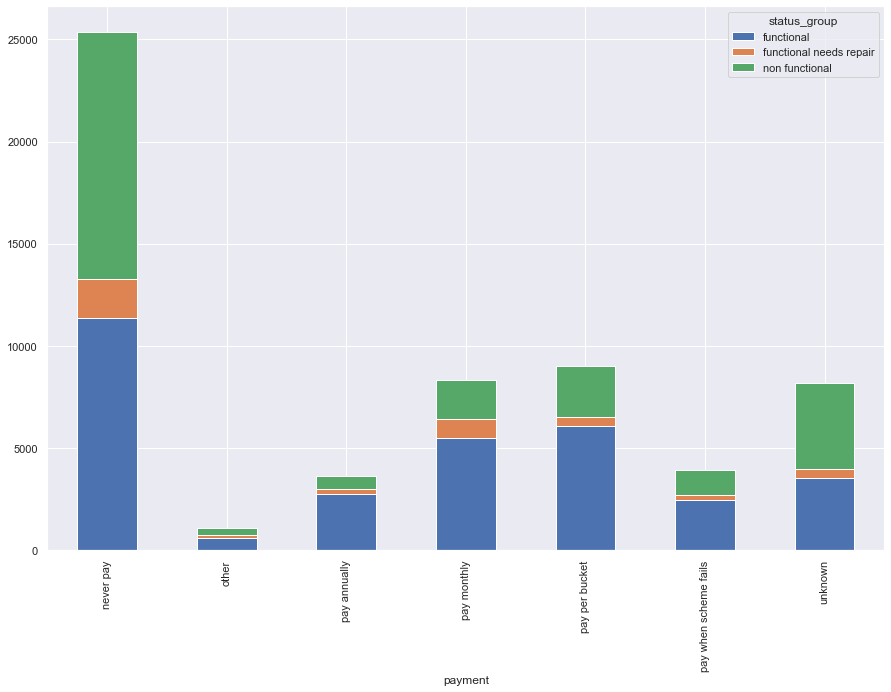

In [16]:
# relationship between payment for service and water pump functionality
water_pumps.groupby(['payment', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

<AxesSubplot:xlabel='quantity'>

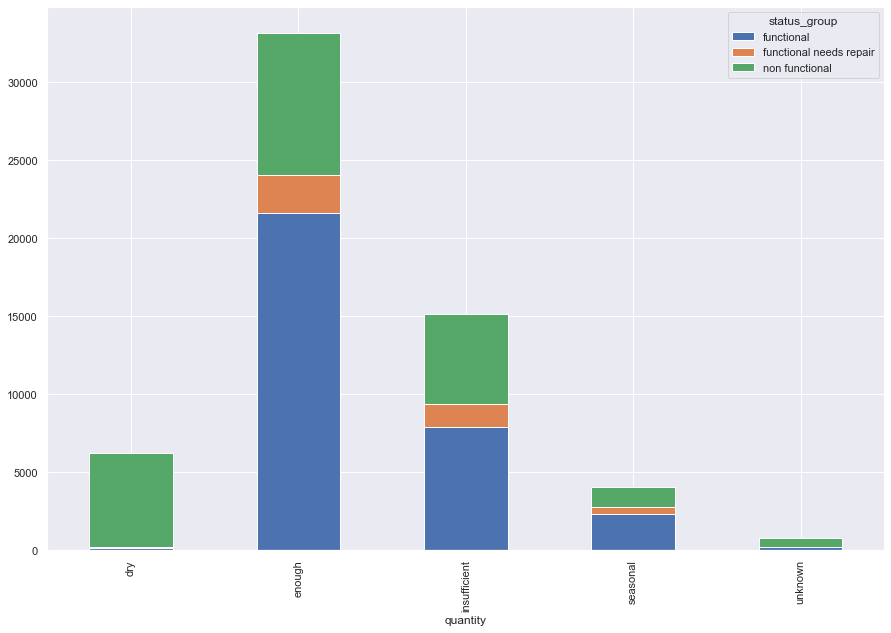

In [17]:
# relationship between quantity of water and water pump functionality
water_pumps.groupby(['quantity', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

<AxesSubplot:xlabel='waterpoint_type'>

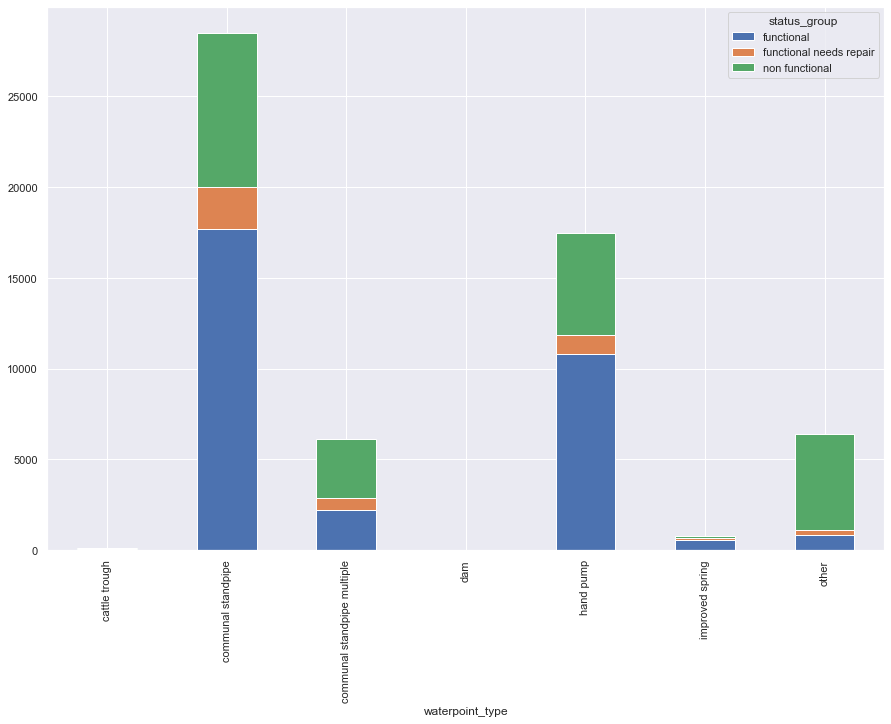

In [18]:
# relationship between type and water pump functionality
water_pumps.groupby(['waterpoint_type', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

<AxesSubplot:xlabel='basin'>

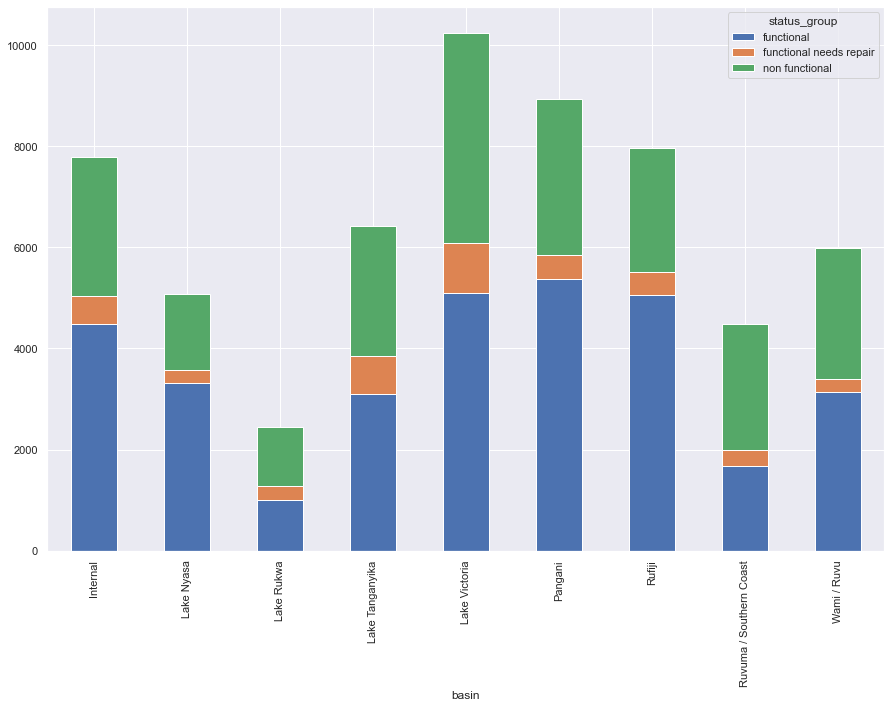

In [31]:
# relationship between basin and water pump functionality
water_pumps.groupby(['basin', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

<AxesSubplot:xlabel='extraction_type_class'>

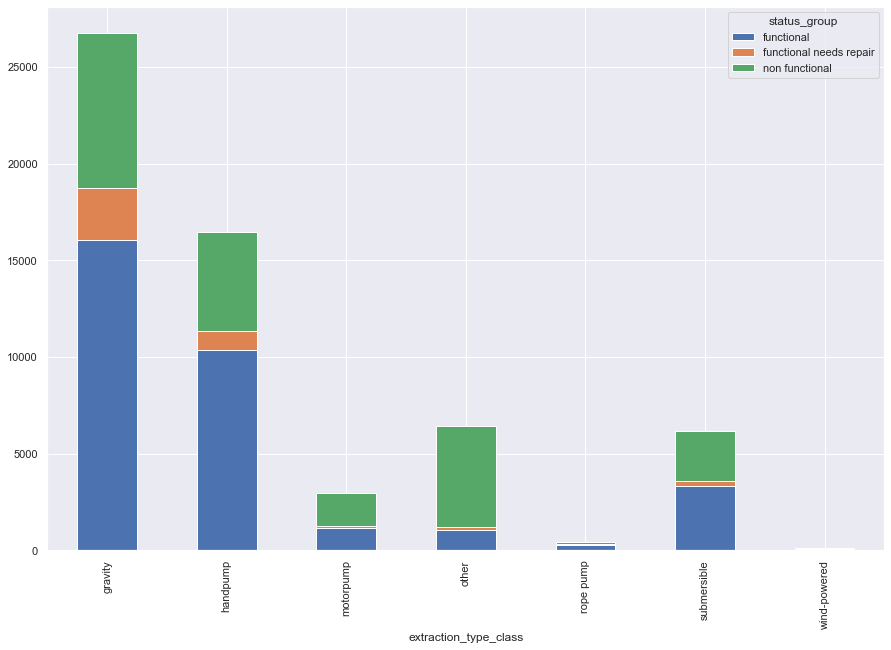

In [33]:
# relationship between quantity of water and water pump functionality
water_pumps.groupby(['extraction_type_class', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

<AxesSubplot:xlabel='quality_group'>

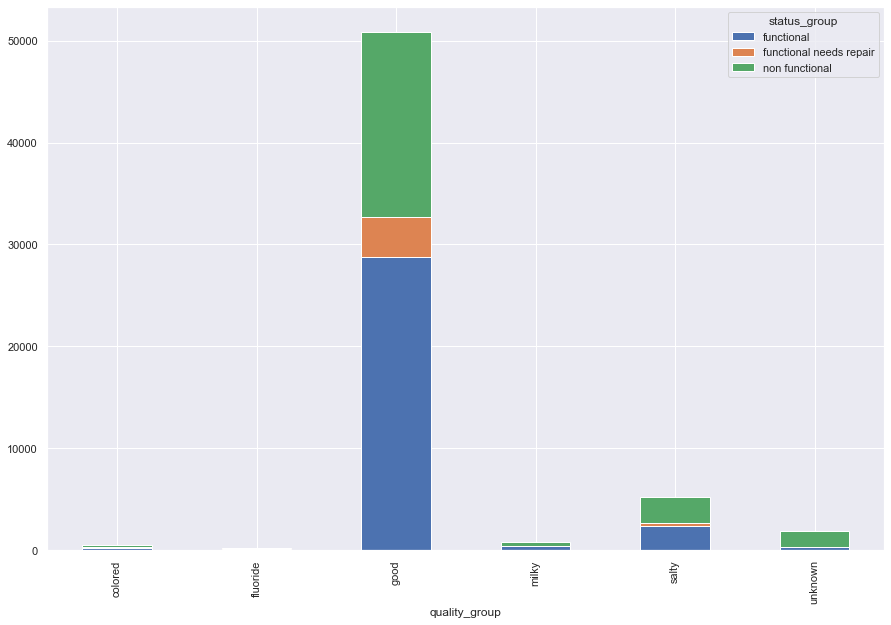

In [29]:
# relationship between quality of water and water pump functionality
water_pumps.groupby(['quality_group', 'status_group']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 10))

In [4]:
# selecting all water pumps that are non-functional
non_functional_pumps = water_pumps[water_pumps.status_group == 'non functional']

In [5]:
# selecting all water pumps that are functional
functional_pumps = water_pumps[water_pumps.status_group == 'functional']

In [6]:
# selecting all water pumps that are functional but need repair
functional_repair_pumps = water_pumps[water_pumps.status_group == 'functional needs repair']

In [34]:
# quantitative description of non-functional pumps
non_functional_pumps.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22824.0,29691.028566,17147.831974,3.000000,14845.000000,29723.000000,44553.250000,5.939400e+04
id,22824.0,37219.076498,21424.426675,0.000000,18764.250000,37290.000000,55602.000000,7.424700e+04
amount_tsh,22824.0,123.481230,1110.120571,0.000000,0.000000,0.000000,0.000000,1.170000e+05
gps_height,22824.0,574.464774,642.752316,-59.000000,0.000000,293.000000,1211.000000,2.627000e+03
longitude,22824.0,34.381006,6.059035,0.000000,33.002248,34.958415,37.567890,4.034430e+01
latitude,22824.0,-5.810394,2.973262,-11.586297,-8.515783,-5.421238,-3.350447,-2.000000e-08
num_private,22824.0,0.413950,12.837552,0.000000,0.000000,0.000000,0.000000,1.776000e+03
region_code,22824.0,17.644585,21.062313,1.000000,5.000000,13.000000,18.000000,9.900000e+01
district_code,22824.0,6.494173,11.255356,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,22824.0,170.016430,413.094978,0.000000,0.000000,1.000000,230.000000,9.865000e+03


In [7]:
# quantitative description of functional but need repair pumps
functional_repair_pumps.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4317.0,29601.585129,17083.395794,18.00000,14866.000000,29818.000000,44451.000000,5.936500e+04
id,4317.0,37151.263609,21340.576248,20.00000,18715.000000,37180.000000,55706.000000,7.423300e+04
amount_tsh,4317.0,267.071577,1925.026420,0.00000,0.000000,0.000000,50.000000,1.000000e+05
gps_height,4317.0,627.607135,648.397850,-51.00000,0.000000,385.000000,1243.000000,2.770000e+03
longitude,4317.0,31.242086,10.169667,0.00000,30.799300,33.827215,36.668018,4.028360e+01
latitude,4317.0,-5.162580,3.099036,-11.64944,-7.860679,-4.656811,-3.158054,-2.000000e-08
num_private,4317.0,0.307621,4.736658,0.00000,0.000000,0.000000,0.000000,1.600000e+02
region_code,4317.0,15.443595,16.346936,1.00000,6.000000,15.000000,17.000000,9.900000e+01
district_code,4317.0,4.759092,8.062250,0.00000,1.000000,3.000000,4.000000,8.000000e+01
population,4317.0,175.102154,433.033756,0.00000,0.000000,25.000000,245.000000,1.530000e+04


In [43]:
# quantitative description of functional pumps
functional_pumps.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,32259.0,29718.597012,17156.208846,0.000000,14851.500000,29665.000000,44564.000000,5.939900e+04
id,32259.0,37036.753154,21488.751249,1.000000,18324.500000,36888.000000,55682.000000,7.424200e+04
amount_tsh,32259.0,461.798235,3889.735284,0.000000,0.000000,0.000000,50.000000,3.500000e+05
gps_height,32259.0,740.131188,724.193683,-90.000000,0.000000,550.000000,1404.000000,2.628000e+03
longitude,32259.0,34.242071,6.200054,0.000000,33.368557,34.969884,37.057074,4.034519e+01
latitude,32259.0,-5.704921,2.897323,-11.564324,-8.640908,-4.904257,-3.322252,-2.000000e-08
num_private,32259.0,0.539012,12.493497,0.000000,0.000000,0.000000,0.000000,1.402000e+03
region_code,32259.0,13.616417,14.602030,1.000000,5.000000,11.000000,17.000000,9.900000e+01
district_code,32259.0,5.134660,8.467026,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,32259.0,187.553303,513.198991,0.000000,0.000000,40.000000,200.000000,3.050000e+04


array([[<AxesSubplot:title={'center':'construction_year'}>]], dtype=object)

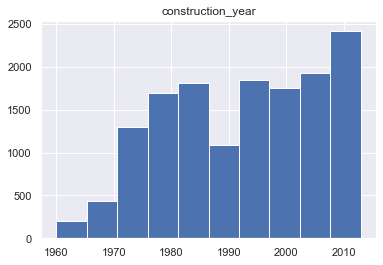

In [33]:
# construction year histogram
non_functional_pumps = non_functional_pumps[non_functional_pumps.construction_year != 0]
non_functional_pumps.hist(column='construction_year')

array([[<AxesSubplot:title={'center':'construction_year'}>]], dtype=object)

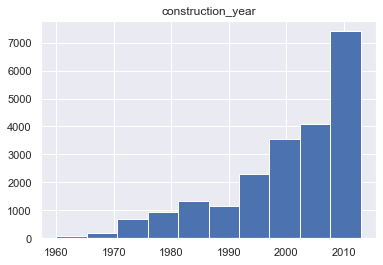

In [37]:
# construction year histogram
functional_pumps = functional_pumps[functional_pumps.construction_year != 0]
functional_pumps.hist(column='construction_year')

In [56]:
# sorted list of villages with the highest number of non-functional pumps
non_functional_pumps.groupby(['subvillage'])['status_group'].count().sort_values(ascending=False).head()

subvillage
Majengo     232
Shuleni     231
Madukani    217
Kati        115
Sokoni      108
Name: status_group, dtype: int64

In [57]:
# sorted list of wards with the highest number of non-functional pumps
non_functional_pumps.groupby(['ward'])['status_group'].count().sort_values(ascending=False).head()

ward
Mishamo     145
Bungu        81
Kikatiti     73
Ipande       72
Nduruma      64
Name: status_group, dtype: int64

In [6]:
# most common installers of non-functional pumps
non_functional_pumps.groupby(['installer'])['status_group'].count().sort_values(ascending=False).head()

installer
DWE                   6347
Government            1034
RWE                    765
Central government     450
DANIDA                 425
Name: status_group, dtype: int64

In [7]:
# most common funders of non-functional pumps
non_functional_pumps.groupby(['funder'])['status_group'].count().sort_values(ascending=False).head()

funder
Government Of Tanzania    4663
Danida                    1242
Hesawa                    1034
World Bank                 707
Kkkt                       498
Name: status_group, dtype: int64

In [8]:
# most common installers of functional pumps
functional_pumps.groupby(['installer'])['status_group'].count().sort_values(ascending=False).head()

installer
DWE           9433
Commu          724
DANIDA         542
CES            538
Government     535
Name: status_group, dtype: int64

In [9]:
# most common funder of functional pumps
functional_pumps.groupby(['funder'])['status_group'].count().sort_values(ascending=False).head()

funder
Government Of Tanzania    3720
Danida                    1713
Hesawa                     936
Rwssp                      805
World Vision               743
Name: status_group, dtype: int64

Summary: Most water pumps in Tanzania are functional. The highest concentration of non-functional water pumps is located in the Mishamo, Bungu, and Kikatiti wards. More specifically, the Majengo, Shuleni, and Madukani subvillages are most affected.

Interestingly, the installer of a waterpump does affects functionality, but the opposite is true for the funder.

Some factors that determine water pump functionality include year of construction, payment type, source type, and water pump type. When it comes to the first of these factors, it appears that payment for a service (in this case acess to water) leads to a more dependable water pump. What was also discovered is that Lake Rukwa and the Souther Coast of Tanzania are non-optimal sources of water. Finally, water pumps that do not extract water via a handpump, gravity, or a submersible mechanism tend to fail. 


## 2. Feature Selection

In [3]:
water_pumps = pd.read_csv('cleaned_water_pumps_data.csv')

In [4]:
# drop unnecessary column
water_pumps.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
# creating a correlation matrix
water_pumps_correlation = water_pumps.corr()

<AxesSubplot:>

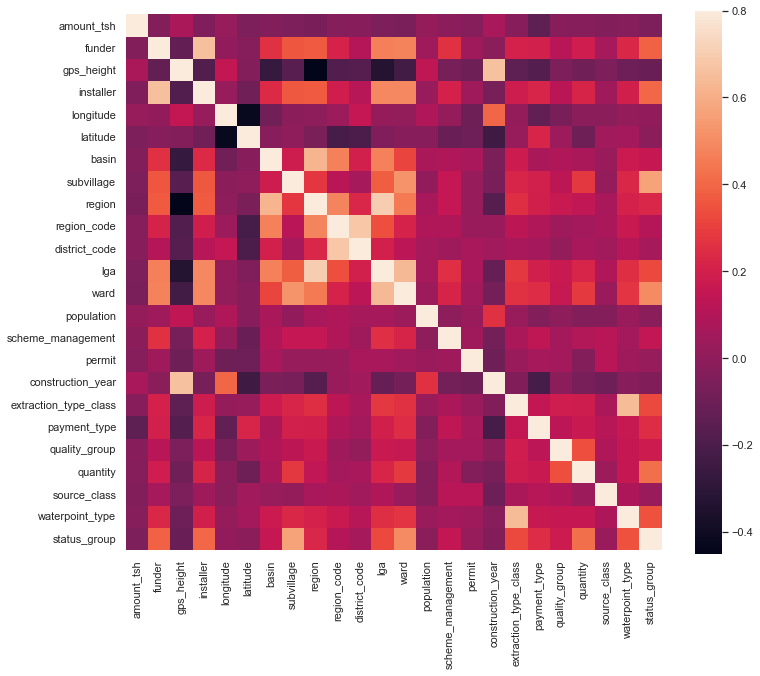

In [6]:
f, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(water_pumps_correlation, vmax = .8, square=True)

In [7]:
# Using a Random Forest algorithm to evaluate feature importance
from sklearn.ensemble import RandomForestRegressor

In [8]:
X = water_pumps[water_pumps_correlation.columns[:-1]]

In [9]:
y = water_pumps['status_group'].values

In [10]:
model = RandomForestRegressor()

In [11]:
model.fit(X,y)

RandomForestRegressor()

In [12]:
# displaying a sorted list of features and their importance
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance

[('subvillage', 0.3361859303086862),
 ('quantity', 0.11672317259668392),
 ('latitude', 0.0685117723999965),
 ('ward', 0.06850453599132138),
 ('longitude', 0.06757480341877992),
 ('waterpoint_type', 0.05483376689316464),
 ('installer', 0.04721672077314606),
 ('gps_height', 0.0390180839789106),
 ('funder', 0.03868614800530479),
 ('population', 0.02854207990795401),
 ('construction_year', 0.02168590218516562),
 ('extraction_type_class', 0.01702697898403213),
 ('lga', 0.016979979545332185),
 ('payment_type', 0.01312035940544055),
 ('scheme_management', 0.012399708778933939),
 ('amount_tsh', 0.00884378267533018),
 ('district_code', 0.008646725828533954),
 ('region', 0.0074973810567051285),
 ('region_code', 0.006842413517446228),
 ('quality_group', 0.006616219997699703),
 ('basin', 0.006218299479299625),
 ('permit', 0.004299006735752552),
 ('source_class', 0.004026227536380077)]

In [13]:
# display feature importance as a percentage
max_feature_len = len(max(X.columns, key=len))

In [14]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

subvillage: ........... 33.62%
quantity: ............. 11.67%
latitude: ............. 6.85%
ward: ................. 6.85%
longitude: ............ 6.76%
waterpoint_type: ...... 5.48%
installer: ............ 4.72%
gps_height: ........... 3.90%
funder: ............... 3.87%
population: ........... 2.85%
construction_year: .... 2.17%
extraction_type_class:  1.70%
lga: .................. 1.70%
payment_type: ......... 1.31%
scheme_management: .... 1.24%
amount_tsh: ........... 0.88%
district_code: ........ 0.86%
region: ............... 0.75%
region_code: .......... 0.68%
quality_group: ........ 0.66%
basin: ................ 0.62%
permit: ............... 0.43%
source_class: ......... 0.40%


Summary: Based on a correlation matrix and a Random Forest algorithm, the features that are correlated to the functionality of a water pump are 'subvillage', 'quantity', 'ward', 'construction_year', and 'gps_height'.

# Supervised Machine Learning Models

In [4]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
water_pumps.drop(['Unnamed: 0'],axis=1, inplace=True)

In [7]:
# new data frame based on feature selection
water_pumps = water_pumps.loc[:, ['subvillage','quantity','ward','extraction_type_class', 'payment_type', 'waterpoint_type',
                             'lga', 'installer', 'funder', 'construction_year', 'gps_height', 'amount_tsh', 'status_group']]

In [8]:
water_pumps.head(10)

,subvillage,quantity,ward,extraction_type_class,payment_type,waterpoint_type,lga,installer,funder,construction_year,gps_height,amount_tsh,status_group
0,-0.991365,-0.545551,-0.189045,-0.459679,-1.774777,-0.496106,-1.342403,-0.355126,-1.470057,0.733857,1.041252,1.895665,-0.885633
1,-1.605315,0.041402,-0.199327,-0.459679,0.797217,-0.496106,-0.206499,-1.413681,-1.299882,0.745416,1.054237,-0.105970,-0.885633
2,0.371611,-0.545551,-1.277160,-0.459679,-1.039680,0.972290,-0.063967,-0.771461,-2.123462,0.744365,0.025541,-0.097630,-0.885633
3,0.489515,2.757775,1.679871,0.132115,0.797217,0.972290,2.044001,0.110917,-0.215322,0.720196,-0.584751,-0.105970,1.220105
4,-1.281355,-0.230078,-1.084474,-0.459679,0.797217,-0.496106,0.129908,-0.004231,-0.018088,-1.366788,-0.964200,-0.105970,-0.885633
5,0.014484,-0.545551,-1.097141,0.132115,-1.039680,0.972290,-1.295714,-0.062816,-1.289381,0.744365,-0.964200,-0.099298,-0.885633
6,0.867469,-0.545551,-0.184318,-0.531761,0.797217,-0.412096,0.036133,-0.829296,-0.112349,-1.366788,-0.964200,-0.105970,1.220105
7,0.259181,-0.545551,0.799500,-0.531761,1.033461,-0.412096,0.160304,-0.062816,-0.277666,-1.366788,-0.964200,-0.105970,1.220105
8,1.202200,-0.230078,1.279530,-0.531761,0.797217,-0.412096,1.505807,0.131215,-1.005363,-1.366788,-0.964200,-0.105970,1.220105
9,0.014484,-0.545551,-0.415054,-0.531761,0.797217,-0.412096,0.129908,-0.004231,-0.163808,-1.366788,-0.964200,-0.105970,-0.885633


In [9]:
pumps.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [8]:
water_pumps['status_group'] = pumps['status_group']

In [11]:
water_pumps.head(10)

,subvillage,quantity,ward,extraction_type_class,payment_type,waterpoint_type,lga,installer,funder,construction_year,gps_height,amount_tsh,status_group
0,-0.991365,-0.545551,-0.189045,-0.459679,-1.774777,-0.496106,-1.342403,-0.355126,-1.470057,0.733857,1.041252,1.895665,functional
1,-1.605315,0.041402,-0.199327,-0.459679,0.797217,-0.496106,-0.206499,-1.413681,-1.299882,0.745416,1.054237,-0.105970,functional
2,0.371611,-0.545551,-1.277160,-0.459679,-1.039680,0.972290,-0.063967,-0.771461,-2.123462,0.744365,0.025541,-0.097630,functional
3,0.489515,2.757775,1.679871,0.132115,0.797217,0.972290,2.044001,0.110917,-0.215322,0.720196,-0.584751,-0.105970,non functional
4,-1.281355,-0.230078,-1.084474,-0.459679,0.797217,-0.496106,0.129908,-0.004231,-0.018088,-1.366788,-0.964200,-0.105970,functional
5,0.014484,-0.545551,-1.097141,0.132115,-1.039680,0.972290,-1.295714,-0.062816,-1.289381,0.744365,-0.964200,-0.099298,functional
6,0.867469,-0.545551,-0.184318,-0.531761,0.797217,-0.412096,0.036133,-0.829296,-0.112349,-1.366788,-0.964200,-0.105970,non functional
7,0.259181,-0.545551,0.799500,-0.531761,1.033461,-0.412096,0.160304,-0.062816,-0.277666,-1.366788,-0.964200,-0.105970,non functional
8,1.202200,-0.230078,1.279530,-0.531761,0.797217,-0.412096,1.505807,0.131215,-1.005363,-1.366788,-0.964200,-0.105970,non functional
9,0.014484,-0.545551,-0.415054,-0.531761,0.797217,-0.412096,0.129908,-0.004231,-0.163808,-1.366788,-0.964200,-0.105970,functional


In [9]:
water_pumps['status_group'] = water_pumps['status_group'].replace({'functional': 0, 'functional needs repair': 1, 'non functional': 2})

In [10]:
water_pumps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subvillage             59400 non-null  float64
 1   quantity               59400 non-null  float64
 2   ward                   59400 non-null  float64
 3   extraction_type_class  59400 non-null  float64
 4   payment_type           59400 non-null  float64
 5   waterpoint_type        59400 non-null  float64
 6   lga                    59400 non-null  float64
 7   installer              59400 non-null  float64
 8   funder                 59400 non-null  float64
 9   construction_year      59400 non-null  float64
 10  gps_height             59400 non-null  float64
 11  amount_tsh             59400 non-null  float64
 12  status_group           59400 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 5.9 MB


In [11]:
array = water_pumps.values

In [12]:
X = array[:, 0:12]
y = array[:, 12]

In [17]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear and Non-Linear Classifiers

In [20]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [21]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [22]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.784428 (0.003789)
LDA: 0.783439 (0.002871)
KNN: 0.795896 (0.002553)
CART: 0.762584 (0.001854)
NB: 0.741435 (0.012132)


Summary: A KNN Classifier model yielded the highest accuracy score out of a mixture of linear and non-linear models, including Linear Regression and Naive Bayes. Using K-Fold Cross Validation with five folds, a KNN Classifier had an accuracy score of .795896. The KNN Classifier will be improved by calculating the optimal k value.

## Ensemble Methods

In [23]:
ensembles = []
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))

In [24]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBM: 0.804461 (0.003448)
RF: 0.804588 (0.003967)


Summary: The Ensemble Methods performed better than their linear and non-linear counterparts. In particular, a Random Forest model obtained an accuracy score of .804588. This Random Forest model as well as the KNN Classifier will be optimized in hopes of achieving a higher score. 

# Model Optimization

## KNN Classifier

In [19]:
# finding the optimal k-value
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 80.14309764309763%


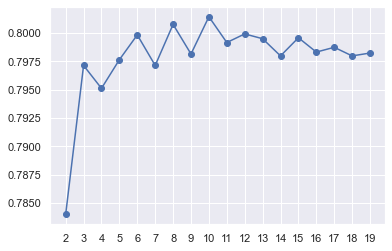

In [20]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

Summary: The optimal k-value for the KNN Classifier model was found to be equal to 10. Given this k-value, the model had an accuracy score of .8014

## Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV

In [25]:
# used to find the optimal number of estimators
param_grid = {
    'n_estimators': [100, 200, 300]
}

In [24]:
random_forest_model = RandomForestClassifier()

In [26]:
grid_search = GridSearchCV(estimator = random_forest_model , param_grid = param_grid, cv = 3, n_jobs = -1)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300]})

In [31]:
# optimal number of estimators
print(grid_search.best_params_)

{'n_estimators': 100}


In [32]:
# best Random Forest score
print(grid_search.best_score_)

0.8097643097643098


Summary: Using a grid search, it was determined that using 100 estimators is optimal for the Random Forest model. Given this number of estimators, the model achieved an accuracy score of .8097, slightly higher than the KNN Classifier.

## Balancing the Dataset 

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [40]:
random_forest_model = RandomForestClassifier(n_estimators=100)

In [41]:
random_forest_model.fit(X_train, y_train);

/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


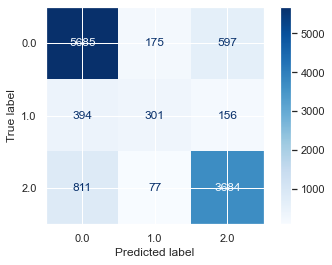

In [42]:
# plotting a confusion matrix for the best performing model
plot_confusion_matrix(random_forest_model, X_test, y_test, cmap='Blues')

In [43]:
# count of observations in each status group where 0=functional, 1=functional but needs repair, 2=nonfunctional
water_pumps.groupby('status_group').size()

status_group
0    32259
1     4317
2    22824
dtype: int64

In [21]:
# select all type 1 water pump entries: functional but needs repair
balanced_water_pumps = water_pumps.loc[water_pumps.status_group == 1]

In [24]:
# select 4317 random type 0 water pump entries: functional
type_0_pumps = water_pumps[water_pumps.status_group == 0].sample(n=4317) 

In [27]:
# combine type 0 and type 1 entries
balanced_water_pumps = pd.concat([balanced_water_pumps, type_0_pumps])

In [29]:
# check that concatenation was successful
balanced_water_pumps.shape

(8634, 13)

In [32]:
# select 4317 random type 2 water pump entries: non-functional
type_2_pumps = water_pumps[water_pumps.status_group == 2].sample(n=4317) 

In [33]:
# combine type 0, type 1, and type 2 entries to create a balaced dataset
balanced_water_pumps = pd.concat([balanced_water_pumps, type_2_pumps])

In [34]:
# check that concatenation was successful
balanced_water_pumps.shape

(12951, 13)

In [36]:
array = balanced_water_pumps.values

In [37]:
X = array[:, 0:12]
y = array[:, 12]

In [38]:
# new train and test data generated from balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# train the model
random_forest_model.fit(X_train, y_train);

/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


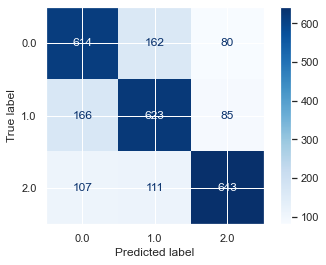

In [46]:
# plotting a confusion matrix for the model
plot_confusion_matrix(random_forest_model, X_test, y_test, cmap='Blues')

In [49]:
# view the accuracy score
random_forest_model.score(X_test, y_test)

0.7255885758394442

Summary: The original dataset was imbalanced due to a discrepancy in the number of observations in each of the target classes. For example, observations in the "functional" class contained 32259 observations while the "functional but needs repair" class only contained 4317 observations. To create a balanced dataset, 4317 observations from each target class were concatenated. As a result, the true positive rate for the balanced dataset was calculated to be .71 for the "functional but needs repair" class. In the original dataset, this value was equal to .35, which is significantly lower. Although the true positive rate was improved, the Random Forest model's accuracy decreased from .8097 to .7255

## Fitting Models with Balanced Dataset

In [52]:
from sklearn.svm import SVC

In [53]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [54]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [55]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.612645 (0.005319)
LDA: 0.623842 (0.009401)
KNN: 0.672008 (0.013876)
CART: 0.672394 (0.014335)
NB: 0.602896 (0.004830)
SVM: 0.662355 (0.006558)


Summary: balancing the dataset had a detrimental effect on the accuracy of the models. Perhaps a balanced dataset with more observations in each status group would lead to a better performance.